In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data = pd.read_csv("forestfires.csv")
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
abs(data.corr('pearson')['DC']).sort_values(ascending=False)

DC      1.000000
DMC     0.682192
temp    0.496208
FFMC    0.330512
ISI     0.229154
wind    0.203466
Y       0.101178
X       0.085916
area    0.049383
RH      0.039192
rain    0.035861
Name: DC, dtype: float64

In [4]:
X = data["DC"]
Y = data["DMC"]

In [5]:
X = (X - X.min())/(X.max()-X.min())
Y = (Y - Y.min())/(Y.max()-Y.min())
# print(X)
# print(Y)

In [6]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [7]:
x_train = np.array(xtrain)
y_train = np.array(ytrain)

x_test = np.array(xtest)
y_test = np.array(ytest)

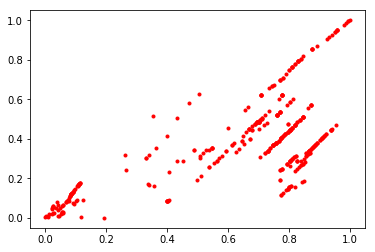

In [8]:
plt.plot(xtrain,ytrain, 'r.')

In [9]:
def hypothesis(a,b,x):
    return a*x**2 + b

In [10]:
def error(a,b,x,y):
    e = 0
    m = len(y)
    for i in range(m):
        e += np.power((hypothesis(a,b,x[i]) - y[i]), 2)
    
    return (1/(2*m)) * e

In [11]:
def step_gradient(a,b,x,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,b,x[i]) - y[i]) * x[i]
        grad_b += 2/m * (hypothesis(a,b,x[i]) - y[i])
    
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    
    return a, b

In [12]:
def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a, b, x ,y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}")
            
        a, b = step_gradient(a, b, x, y, learning_rate)

    return a, b

In [13]:
a = 0
b = 0
learning_rate = 0.001
iterations = 10000

final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations)

Error: 0.09635609933954101, a: 0, b: 0
Error: 0.017140397351788655, a: 0.2248789347232068, b: 0.2522797097776693
Error: 0.015894400434605493, a: 0.2738727007523076, b: 0.2527807629348136
Error: 0.015256265741862032, a: 0.3067727209833711, b: 0.2375860164070644
Error: 0.014763331552982916, a: 0.3352037766868081, b: 0.2230182655034513
Error: 0.014380333967104182, a: 0.36035933275544235, b: 0.2100255308353265
Error: 0.014083126403415993, a: 0.38265891607112534, b: 0.19850063901036677
Error: 0.013852912435667731, a: 0.40242973287911554, b: 0.1882821582408364
Error: 0.013674973206712425, a: 0.4199587520908892, b: 0.17922230745626272
Error: 0.013537782821875207, a: 0.43550018393924383, b: 0.17118973611894422


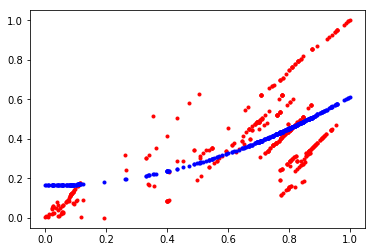

In [14]:
plt.plot(x_train, y_train, 'r.', x_train, hypothesis(final_a, final_b, x_train), 'b.' )

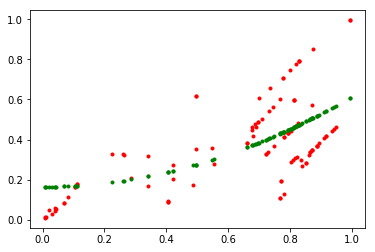

In [15]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, final_b, x_test), 'g.')

In [17]:
print(error(a,b,x_train,y_train))
print(error(final_a, final_b, x_train, y_train))
print(error(final_a, final_b, x_test, y_test))
print(error(final_a, final_b, x_train, y_train) - error(final_a, final_b, x_test, y_test))

0.09635609933954101
0.013432319948850331
0.014191984018405813
-0.0007596640695554813
